In [8]:
import pandas as pd

In [9]:
data = pd.read_csv(r"..\out\Polizeiberichte_transformed.csv", sep=";", encoding="UTF-8")

In [10]:
data.columns

Index(['Timestamp', 'Ueberschrift', 'Hauptartikel', 'Link', 'Ort',
       'Sekundaerer Ort', 'Loc1', 'Loc2', 'Loc3', 'Loc4', 'Author',
       'Ueberschrift_clean', 'Ueberschrift_lem', 'Ueberschrift_lem_no_stop',
       'Ueberschrift_split', 'Ueberschrift_clean2', 'Ueberschrift_lem2',
       'Ueberschrift_lem_clean2', 'Ueberschrift_lem_clean_no_stop',
       'Ueberschrift_kombi', 'Hauptartikel_clean', 'Hauptartikel_lem',
       'Hauptartikel_lemm_clean', 'Hauptartikel_lem_clean_no_stop'],
      dtype='object')

In [11]:
data["text"] = data["Ueberschrift_clean"] + data["Hauptartikel_clean"]

In [16]:
author_counts = data[["Author", "text"]].groupby("Author").count()

In [26]:
authors = list(author_counts[author_counts["text"]>40].index)

['as', 'em', 'fue', 'ka', 'mc', 'ne', 're', 'sky', 'ts', 'va', 'we']

In [28]:
data = data[["text", "Author"]]
data = data[data["Author"].isin(authors)]

In [29]:
data.groupby(by="Author").count()

,text
Author,
as,397
em,714
fue,1052
ka,560
mc,509
ne,473
re,164
sky,56
ts,41


In [30]:
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC

from sklearn.metrics import classification_report, confusion_matrix

In [31]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(data["text"])
X_counts.shape

tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)
X_tfidf.shape

Y = data["Author"]

In [32]:
#X_train, X_test, y_train, y_test = train_test_split(X_counts, Y, test_size=0.95, random_state = 0)

In [33]:
clf_svc = SVC(kernel="linear", probability=True)
#cross_val_score(clf_svc, X_tfidf, Y, cv=5)

In [34]:
clf_svc.fit(X_tfidf, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [40]:
import pickle
filename_model = 'SVC_author_classifier_neu.pkl'
SVC_model_pickle = open(filename_model, 'wb')
pickle.dump(clf_svc, SVC_model_pickle, protocol=2)
SVC_model_pickle.close()

filename_count = 'count_transformer_neu.pkl'
count_pickle = open(filename_count, 'wb')
pickle.dump(count_vect, count_pickle, protocol=2)
count_pickle.close()

filename_tfidf = 'tfidf_transformer_neu.pkl'
tfidf_pickle = open(filename_tfidf, 'wb')
pickle.dump(tfidf_transformer, tfidf_pickle, protocol=2)
tfidf_pickle.close()

In [35]:
import seaborn as sns

In [45]:
new_text = r"Am Mittwoch (10. Juli 2019) steuerte eine ältere Dame mutmaßlich aus Versehen ihr Fahrzeug beim Einparken in die Frontscheibe eines Bäckers im Grüneburgweg.Es war etwa halb eins, als sie vorwärts in die Parklücke fuhr. In der Folge setzte sie ihren Toyota Avensis an die Hauswand und beschädigte das Schaufenster der Backstube. Aktuell wird von einem Bedienfehler ausgegangen.Die Dame wurde hierbei leicht verletzt und es entstand Sachschaden im Wert von mehreren tausend Euro. "

new_text_transf = tfidf_transformer.transform(count_vect.transform([new_text]))

In [46]:
probas = clf_svc.predict_proba(new_text_transf)[0]

In [47]:
plotdata = pd.DataFrame()
plotdata["class"] = clf_svc.classes_
plotdata["probas"] = probas

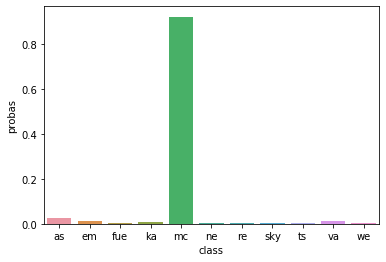

In [48]:
sns.barplot(x="class", y="probas", data=plotdata)